In [ ]:
##### Python Sklearn - Classificaçãão
##### Notebook problema de classificação 
##### SAEE 2020 - Aprendizado de Máquna com Python - Oscar Schmitt Kremer.
##### A execucação de cada uma destas células é feita apertando o botão de play aqui à esquerda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [ ]:
##### Dataset sobre cancer benignos e malignos, em
##### features_names podem ser vistas as variáveis
##### que estão sendo utilizadas para efetuar a 
##### classificação
data = load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
##### Separação aleatória de partes de treino e teste
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
##### Instanciar um modelo de classificação
##### Todo modelo do sklearn possui os métodos fit e predict
##### fit: efetua o treinamento do modelo conforme os dados
##### X e y de treinamento
##### predict: modela um conjunto de dados X de teste e retorna
##### um vetor no formato de y
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_predict = model.predict(X_test)
print(test_predict)
print(model.predict_proba(X_test))

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
[[0.01 0.99]
 [1.   0.  ]
 [0.98 0.02]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.91 0.09]
 [0.74 0.26]
 [0.03 0.97]
 [0.04 0.96]
 [0.99 0.01]
 [0.13 0.87]
 [0.89 0.11]
 [0.05 0.95]
 [0.99 0.01]
 [0.03 0.97]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.26 0.74]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.02 0.98]
 [0.1  0.9 ]
 [0.   1.  ]
 [0.07 0.93]
 [0.   1.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.   1.  ]
 [0.21 0.79]
 [0.09 0.91]
 [0.   1.  ]
 [0.   1.  ]
 [0.67 0.33]
 [0.06 0.94]
 [1.   0.  ]
 [0.1  0.9 ]
 [0.   1.  ]
 [0.98 0.02]
 [0.   1.  ]
 [0.   1.  ]
 [0.35 0.65]
 [0.02 0.98]
 [0.03 0.97]
 [0.02 0.98]
 [0.01 0.99]
 [0.04 0.96]
 [

In [ ]:
##### gerar matriz de confusao dos dados de teste
##### .ravel() torna o retorno em uma sequencia de inteiros
confusion_matrix(y_test, test_predict)


array([[ 59,   4],
       [  2, 106]])

In [ ]:
##### Cálculo de Sensibilidade (TPR ou Recall)
tn, fp, fn, tp = confusion_matrix(y_test, test_predict).ravel()
tp/(tp+fn)

0.9814814814814815

In [ ]:
##### Cálculo de Especificidade (TNR)
tn/(tn+fp)

0.9365079365079365

In [ ]:
##### Cálculo de Precisão (PPV)
tp/(tp+fp)

0.9636363636363636

In [ ]:
##### Cálculo de Acurácia
(tp+tn)/(tp+tn+fp+fn)

0.9649122807017544

In [ ]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]
    
def precision_recall_thres(y_test, y_scores, p, r, thresholds, t):
    '''
    Function to create precision vs recall
    graphic showing specific threshold position
    '''
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    plt.figure(figsize=(8,8))
    plt.title("Curva Precisão e Sensibilidade")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.xlabel('Sensibilidade');
    plt.ylabel('Precisão');
    close_default_clf = np.argmin(np.abs(thresholds - t))
    mean = np.argmin(np.abs(thresholds - 0.50))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    plt.plot(r[mean], p[mean], '^', c='b',
            markersize=15)

     pred_neg  pred_pos
neg        57         6
pos         1       107


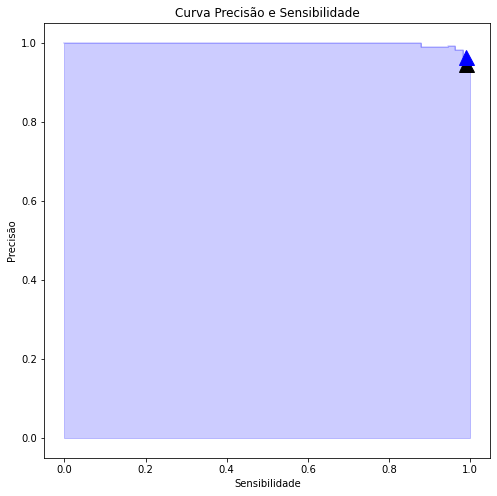

In [ ]:
y_score = model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_score)
precision_recall_thres(y_test, y_score, precisions, recalls, thresholds, 0.3)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    '''
    Função para implementar e 
    gerar a curva ROC
    '''
    plt.clf()
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("Taxa de Falso Positivo")
    plt.ylabel("Taxa de Verdadeiro Positivo")
    plt.legend(loc='best')
    plt.show()

No handles with labels found to put in legend.


0.9967666078777191


<Figure size 432x288 with 0 Axes>

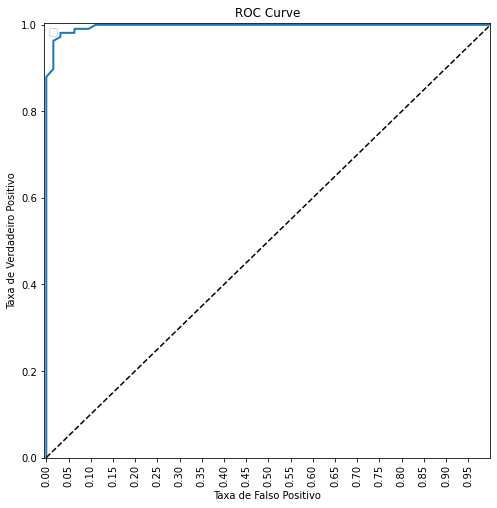

In [ ]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, auc_thresholds = roc_curve(y_test, y_score)
print(auc(fpr, tpr))
plot_roc_curve(fpr, tpr)